In [ ]:

!pip install jovian --upgrade -q
import jovian



     |████████████████████████████████| 68 kB 2.8 MB/s 


In [ ]:
import os 
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import torchvision.transforms as transforms

In [ ]:
project_name='cifar10-cnn'

In [ ]:
!nvidia-smi
# !nvidia-smi to know is carte graphic exist or no 

Sat Nov 13 09:03:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

  0%|          | 0/135107811 [00:00<?, ?it/s]

In [ ]:
!ls

sample_data


In [ ]:
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

FileNotFoundError: ignored

In [ ]:
# verify this using
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'test']
['automobile', 'deer', 'airplane', 'cat', 'ship', 'truck', 'frog', 'bird', 'dog', 'horse']


In [ ]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print('No. of training examples for airplanes:', len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['4212.png', '4211.png', '1616.png', '4981.png', '4020.png']


In [ ]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of test examples for ship:", len(ship_test_files))
print(ship_test_files[:5])

No. of test examples for ship: 1000
['0034.png', '0011.png', '0098.png', '0261.png', '0061.png']


In [ ]:
#  load the data as PyTorch tensors.
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [ ]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())
print(dataset)

Dataset ImageFolder
    Number of datapoints: 50000
    Root location: ./data/cifar10/train
    StandardTransform
Transform: ToTensor()


In [ ]:
# shape image 32*32 ,3 channel RGB
img, label = dataset[10000]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 2


tensor([[[0.6431, 0.4118, 0.4627,  ..., 0.4275, 0.4235, 0.3569],
         [0.6549, 0.4549, 0.2824,  ..., 0.4118, 0.4118, 0.3490],
         [0.5490, 0.5569, 0.4667,  ..., 0.4078, 0.3294, 0.3059],
         ...,
         [0.5451, 0.5569, 0.5294,  ..., 0.3490, 0.3804, 0.4941],
         [0.6392, 0.6000, 0.5725,  ..., 0.3333, 0.3843, 0.4980],
         [0.7176, 0.6902, 0.6039,  ..., 0.3686, 0.3569, 0.4784]],

        [[0.8078, 0.5490, 0.5804,  ..., 0.5765, 0.5765, 0.5059],
         [0.8353, 0.6275, 0.4275,  ..., 0.5569, 0.5569, 0.4980],
         [0.7490, 0.7569, 0.6392,  ..., 0.5451, 0.4706, 0.4510],
         ...,
         [0.5804, 0.6078, 0.6118,  ..., 0.5255, 0.5804, 0.6902],
         [0.6157, 0.6431, 0.6431,  ..., 0.5098, 0.5804, 0.6980],
         [0.6000, 0.7137, 0.6039,  ..., 0.5255, 0.5216, 0.6667]],

        [[0.3294, 0.2392, 0.3961,  ..., 0.2863, 0.2706, 0.2235],
         [0.3294, 0.1922, 0.1686,  ..., 0.3098, 0.2824, 0.2235],
         [0.2549, 0.2588, 0.3098,  ..., 0.3294, 0.2275, 0.

In [ ]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
# we need to change the tensor dimensions to (32,32,3)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))
    

Label:  airplane (0)


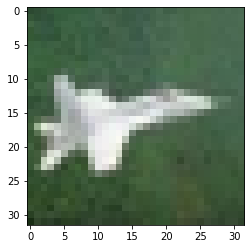

In [ ]:
show_example(*dataset[4])

In [ ]:
!tar -xf 

Label:  airplane (0)


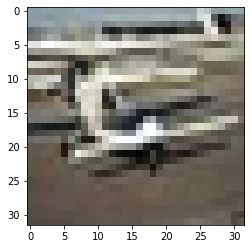

In [ ]:
show_example(*dataset[2021])

In [ ]:
random_seed = 42
torch.manual_seed(random_seed);

In [ ]:
val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [ ]:
jovian.log_dataset(dataset_url=dataset_url, val_size=val_size, random_seed=random_seed)


[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Dataset logged.


In [ ]:
# create data loaders for training and validation, to load the data in batches
from torch.utils.data.dataloader import DataLoader

batch_size=128

In [ ]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  def __init__(self, loader: DataLoader) -> None:


In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  def __init__(self, loader: DataLoader) -> None:


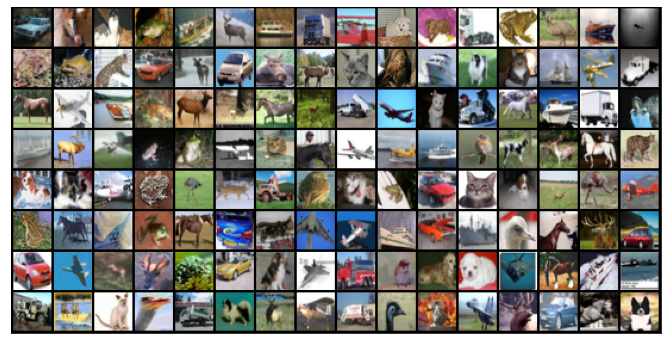

In [ ]:
show_batch(train_dl)
